In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [258]:
df1 = pd.read_csv("NasdaqReturns.csv", encoding='latin-1')
df1.head()

,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.03,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12
0,AAON,Industrial Goods,General Building Materials,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,...,0.185088,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885
1,AAPL,Consumer Goods,Electronic Equipment,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,...,0.192919,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980
2,ABAX,Healthcare,Diagnostic Substances,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,...,0.111541,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043
3,ABCB,Financial,Regional,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,...,-0.024845,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315
4,ABFS,Services,Trucking,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,...,0.113583,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981


In [259]:
print(len(df1))

1158


In [260]:
print(df1['Industry'].value_counts())

Financial            338
Technology           296
Services             202
Healthcare           111
Consumer Goods        80
Industrial Goods      65
Basic Materials       50
Utilities             12
Conglomerates          2
Consumer Cyclical      2
Name: Industry, dtype: int64


In [261]:
print('At least 10%:', (df1['Ret2000.12'] >= .10).sum())
print('Less than -10%:', (df1['Ret2000.12'] < -.10).sum())

At least 10%: 309
Less than -10%: 258


In [262]:
df_industry = df1.groupby('Industry').mean()
df_industry = df_industry[['Ret2008.10']]
print(df_industry)
print('Largest declining industries were Basic Materials, Conglomerates and Industrial Goods.')

                   Ret2008.10
Industry                     
Basic Materials     -0.254674
Conglomerates       -0.265748
Consumer Cyclical   -0.145705
Consumer Goods      -0.155209
Financial           -0.102884
Healthcare          -0.169440
Industrial Goods    -0.233366
Services            -0.173833
Technology          -0.196299
Utilities           -0.120087
Largest declining industries were Basic Materials, Conglomerates and Industrial Goods.


In [263]:
df_subindustry = df1.groupby('SubIndustry').mean()
df_subindustry = df_subindustry[['Ret2008.10']]
df_subindustry.loc[df_subindustry['Ret2008.10'] > 0]

,Ret2008.10
SubIndustry,
Auto Parts Stores,0.020324
Foreign Money Center Banks,0.213287
Home Health Care,0.081868
Trucks & Other Vehicles,0.105902


In [264]:
from scipy.cluster.hierarchy import linkage

X = df1.loc[:,'Ret2000.01':'Ret2009.12']

complete = linkage(X, method='complete', metric = 'euclidean')

We do not need to normalize our data because every column in X is already on a range from (-1,1).

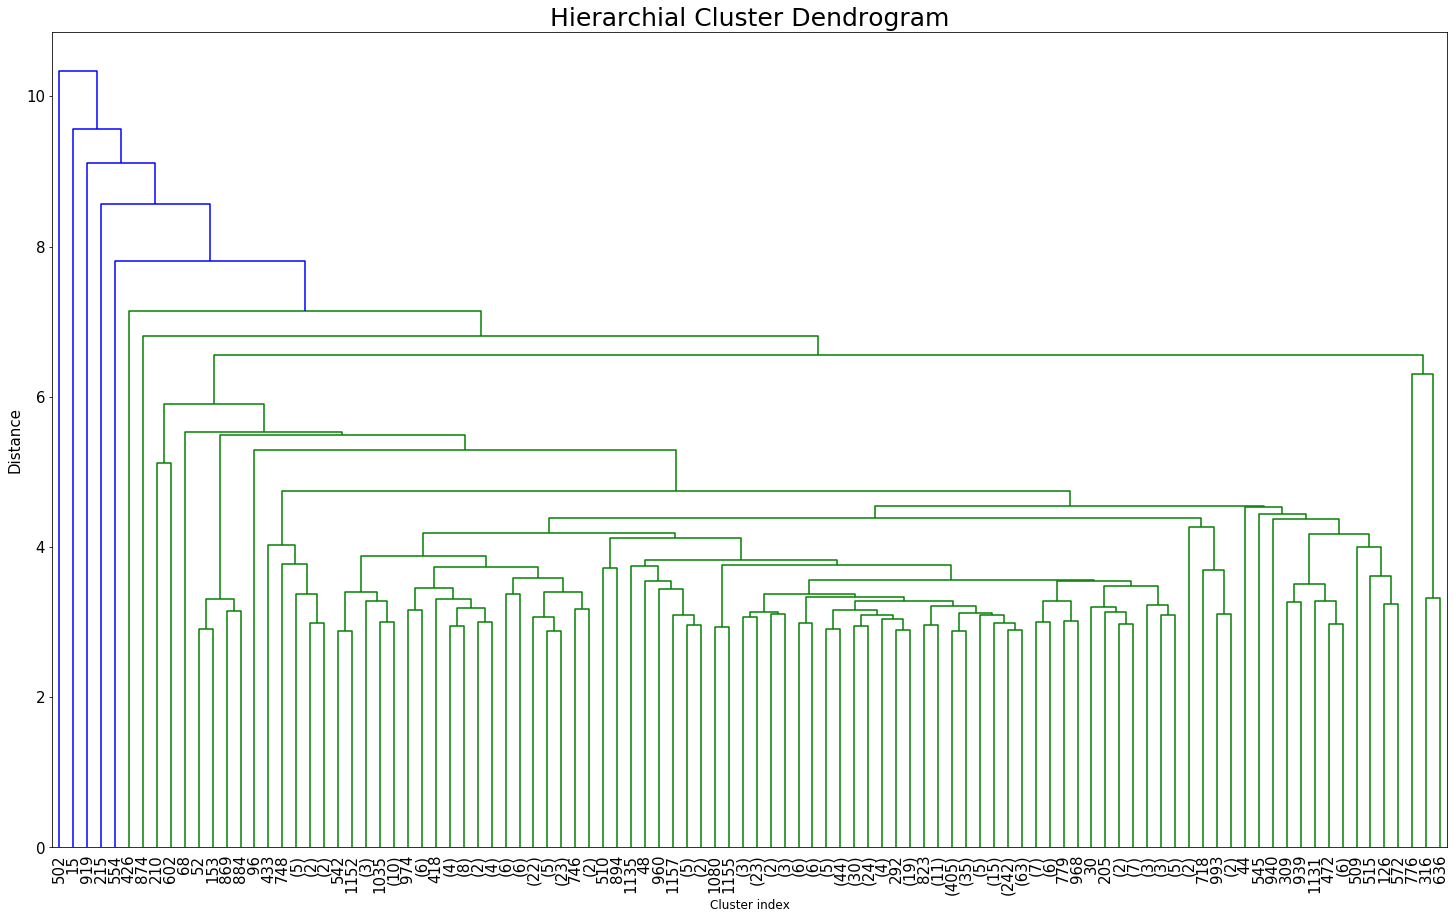

In [265]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(complete, 
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 100, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis 
            leaf_font_size=15,
            show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.show()

In [266]:
complete1 = linkage(X, method='single', metric = 'euclidean')
complete2 = linkage(X, method='average', metric = 'euclidean')
complete3 = linkage(X, method='weighted', metric = 'euclidean')
complete4 = linkage(X, method='centroid', metric = 'euclidean')
complete5 = linkage(X, method='ward', metric = 'euclidean')

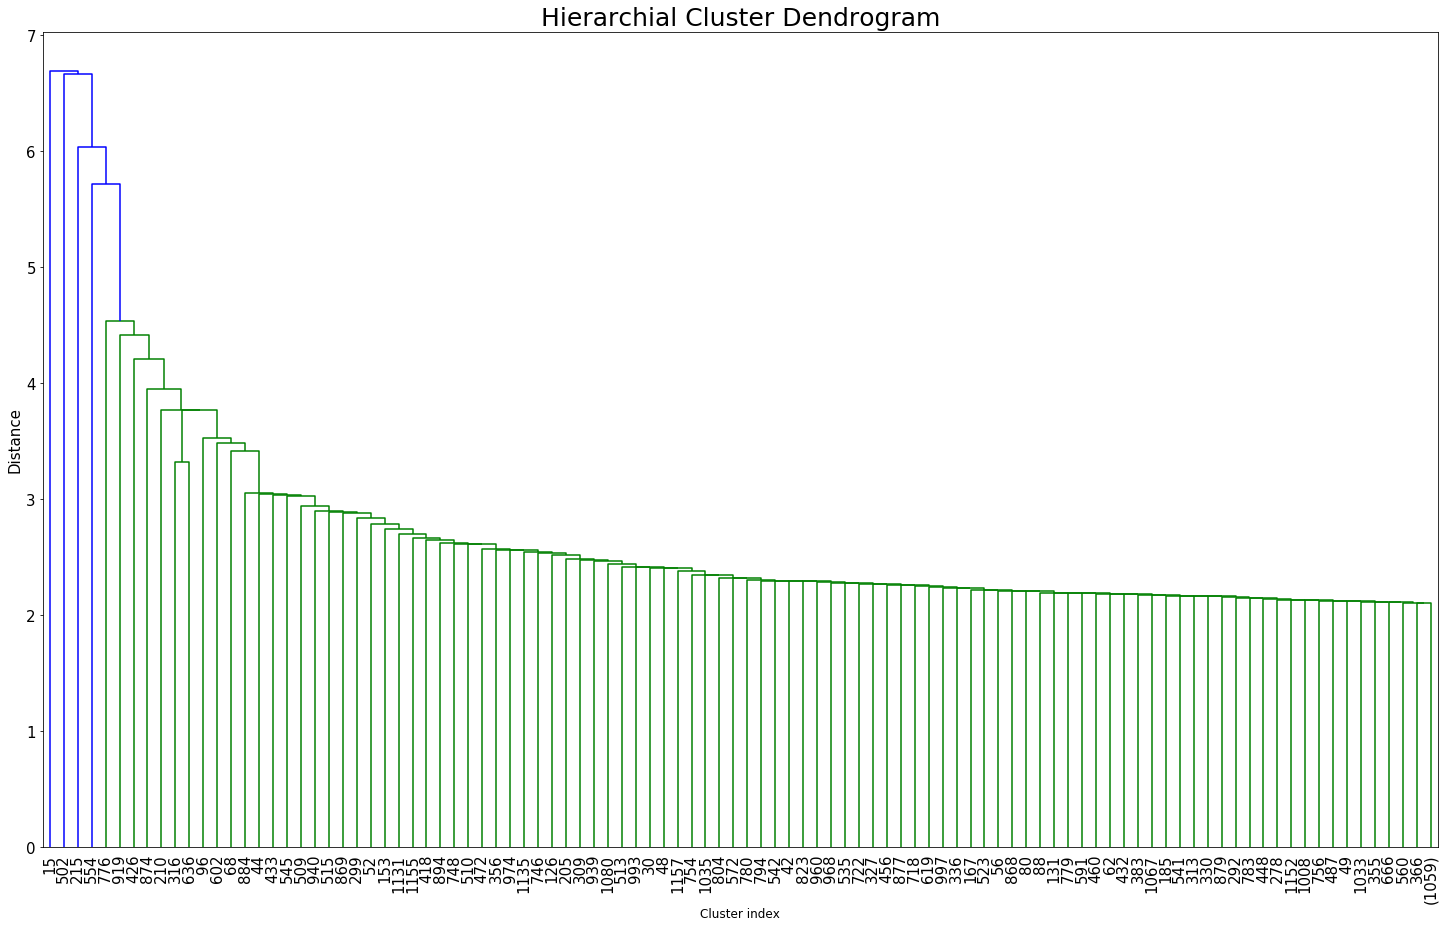

In [267]:
plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(complete1, 
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 100, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis 
            leaf_font_size=15,
            show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.show()

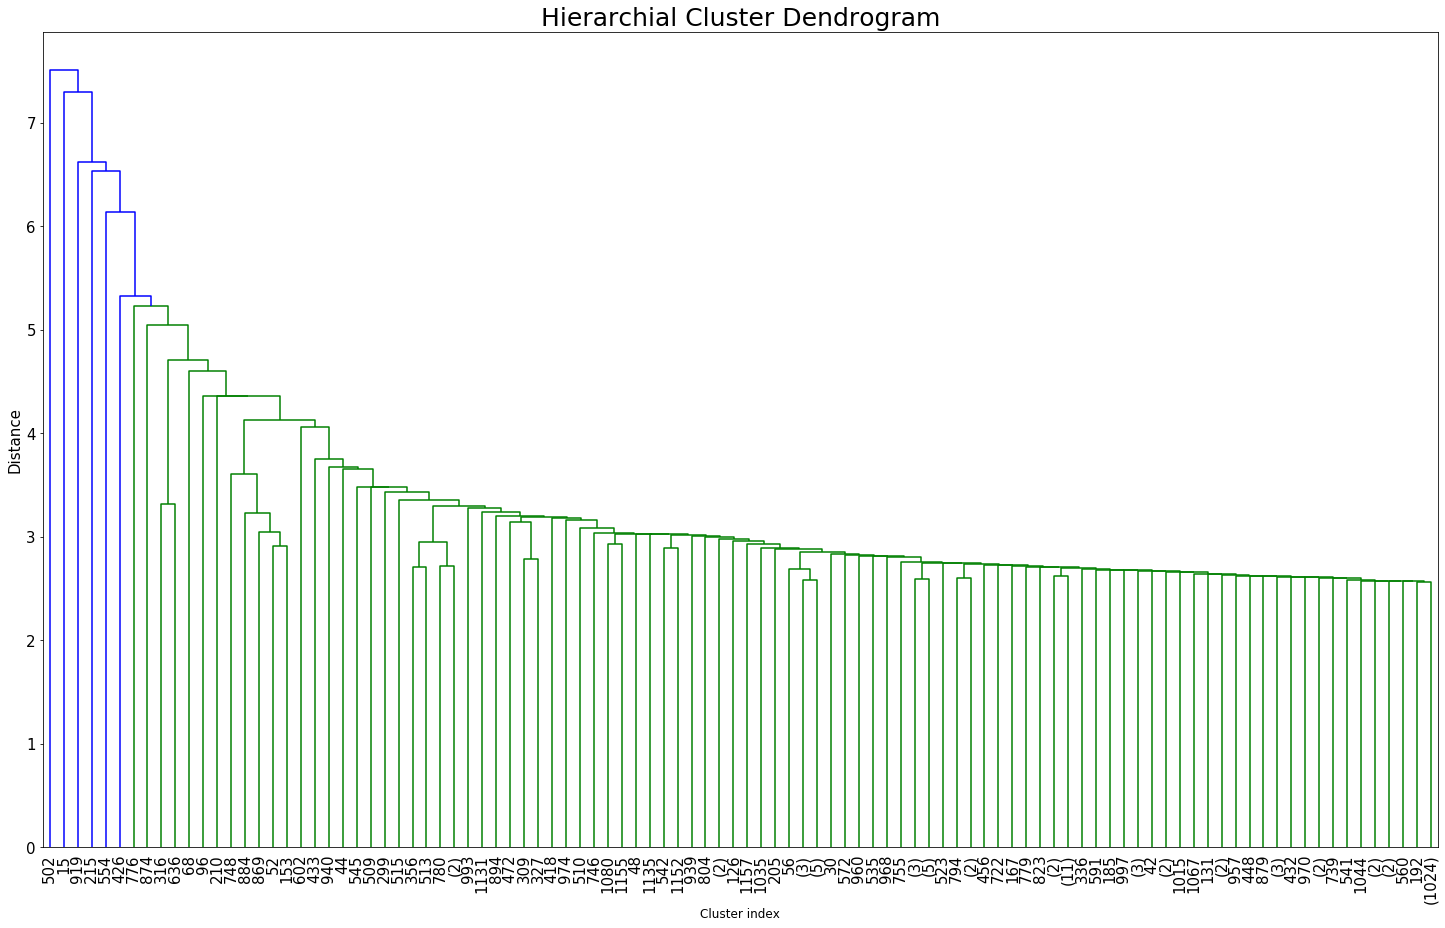

In [268]:
plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(complete2, 
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 100, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis 
            leaf_font_size=15,
            show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.show()

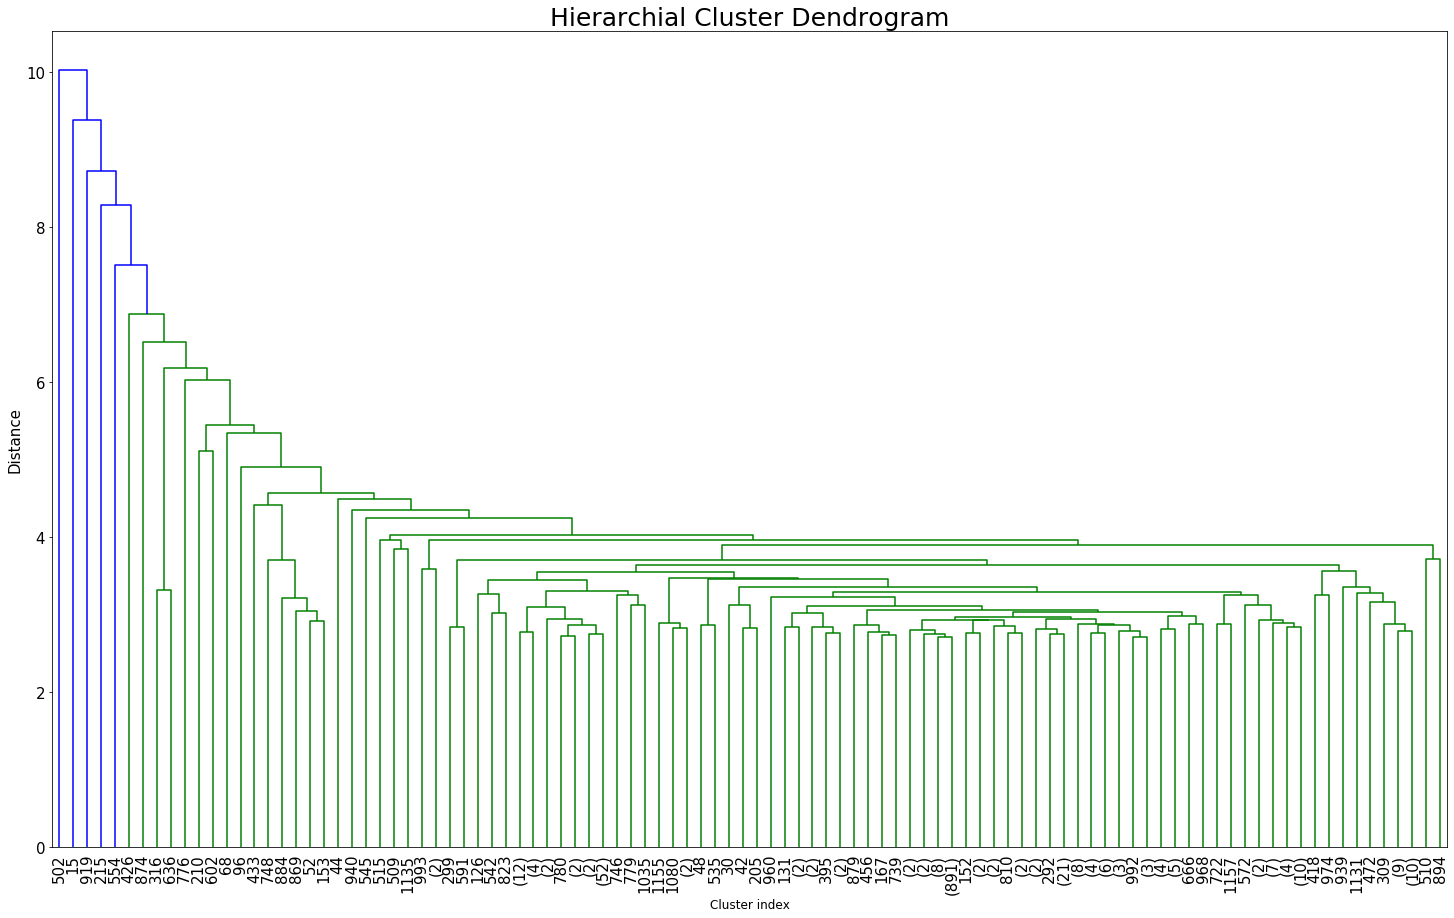

In [269]:
plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(complete3, 
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 100, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis 
            leaf_font_size=15,
            show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.show()

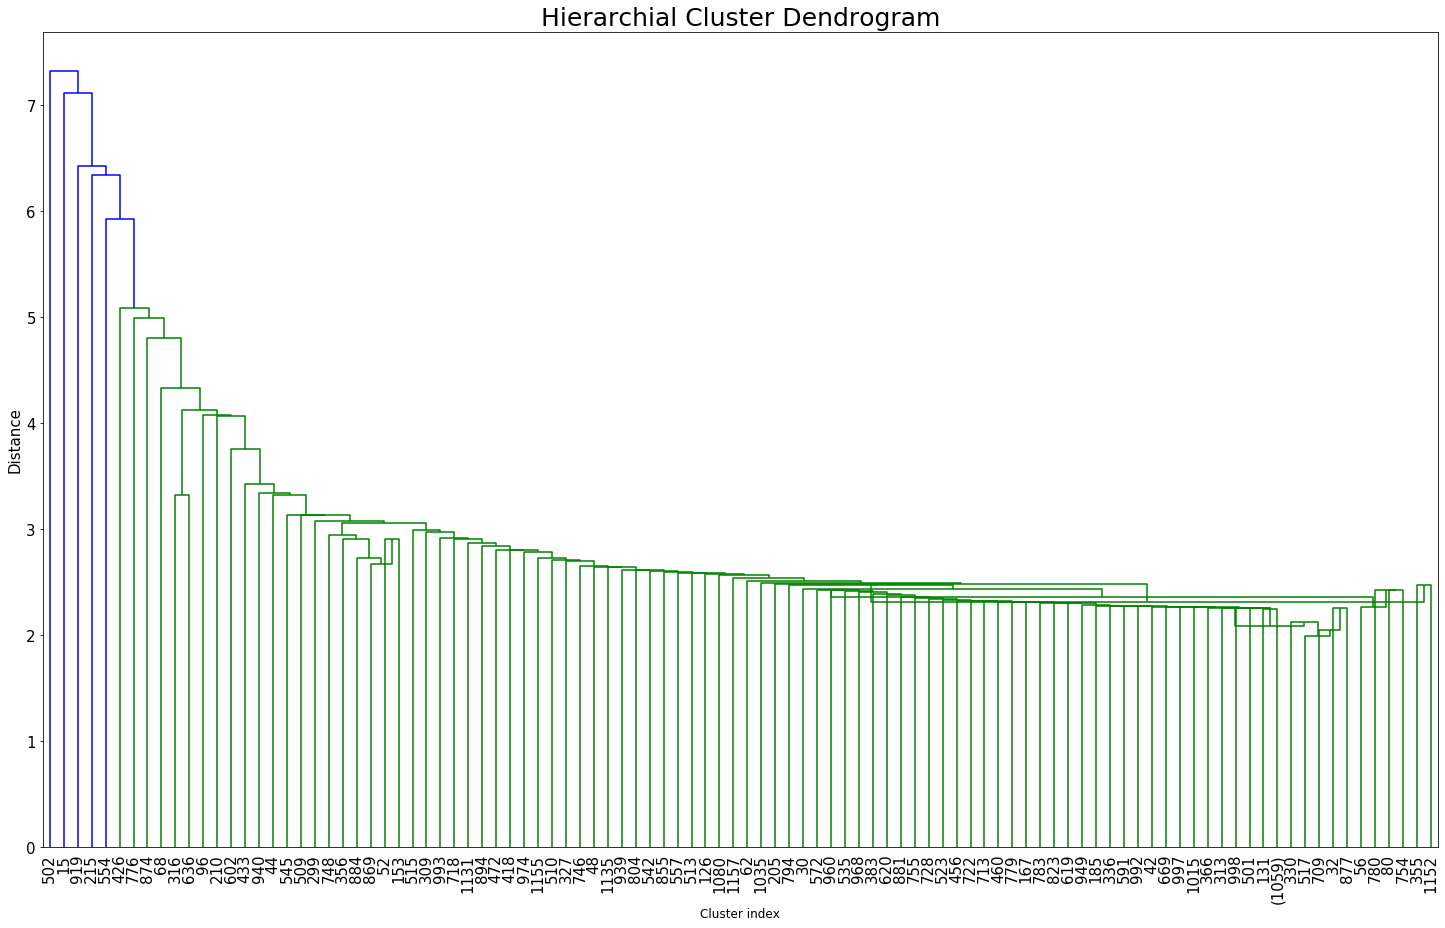

In [270]:
plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(complete4, 
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 100, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis 
            leaf_font_size=15,
            show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.show()

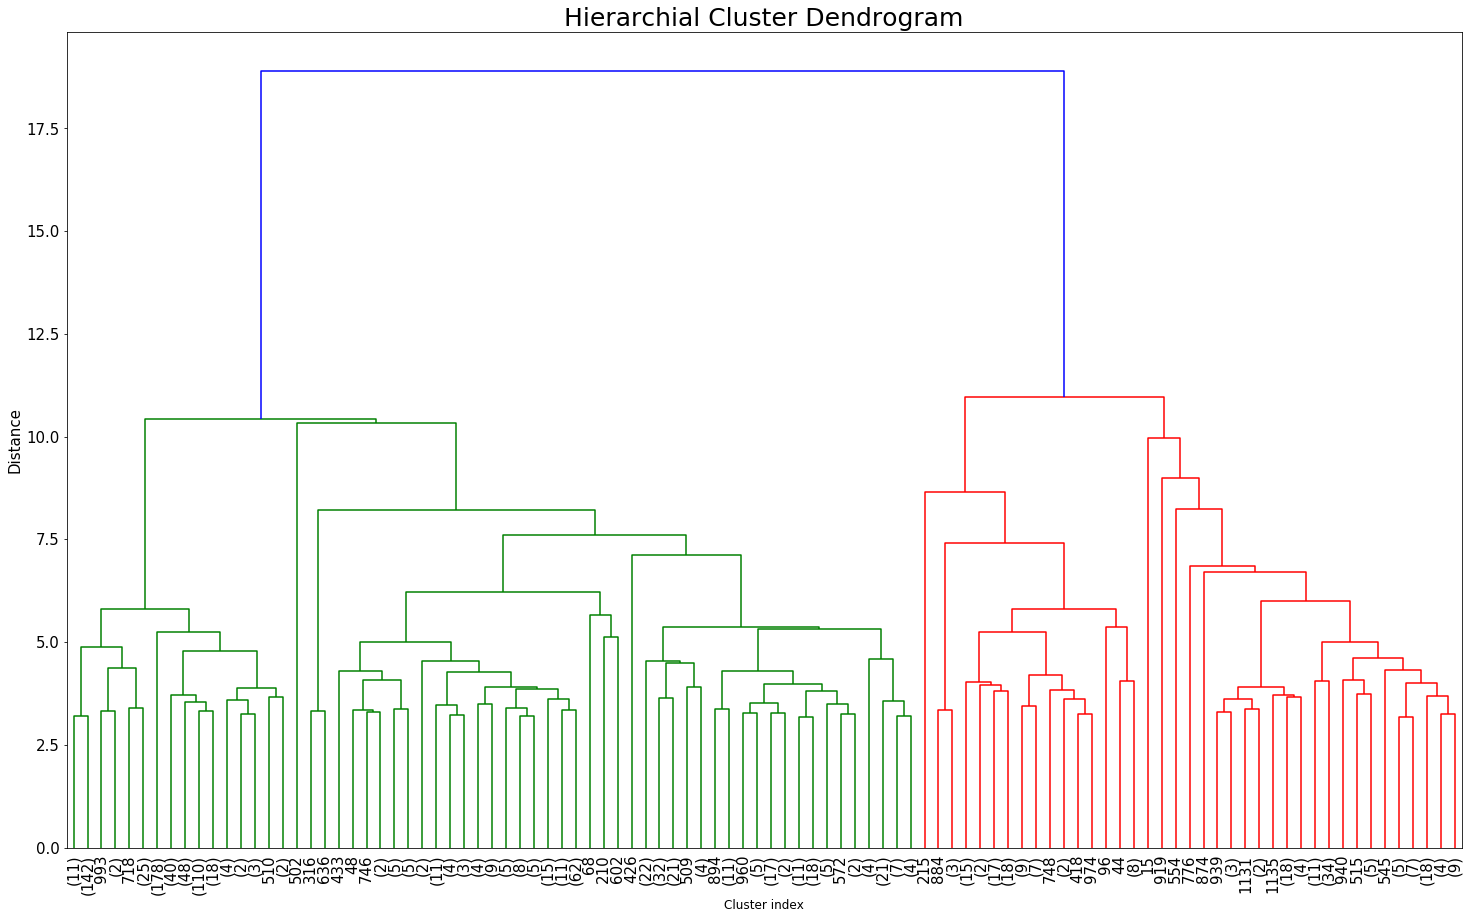

In [271]:
plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(complete5, 
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 100, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis 
            leaf_font_size=15,
            show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.show()

Ward linkage provides the most balanced clusters.

I believe 4 clusters is an appropriate number. This ensures that the single points (15, 502) are grouped together in a larger cluster. The clusters also appear to be balanced. 

In [272]:
from sklearn.cluster import AgglomerativeClustering

ACmodel = AgglomerativeClustering(n_clusters=4, 
                                linkage='ward', affinity = 'euclidean')
ACmodel.fit_predict(X)


array([3, 1, 0, ..., 0, 1, 3])

In [273]:
ACcluster0 =[i for i in range(len(ACmodel.labels_)) 
 if ACmodel.labels_[i] == 0]
ACdfcluster0 = df1.loc[ACcluster0]

ACcluster1 = [i for i in range(len(ACmodel.labels_)) 
 if ACmodel.labels_[i] == 1]
ACdfcluster1 = df1.loc[ACcluster1]

ACcluster2 = [i for i in range(len(ACmodel.labels_)) 
 if ACmodel.labels_[i] == 2]
ACdfcluster2 = df1.loc[ACcluster2]

ACcluster3 = [i for i in range(len(ACmodel.labels_)) 
 if ACmodel.labels_[i] == 3]
ACdfcluster3 = df1.loc[ACcluster3]


print('Number of companies:')
print('Cluster 0:', len(ACdfcluster0))
print('Cluster 1:', len(ACdfcluster1))
print('Cluster 2:', len(ACdfcluster2))
print('Cluster 3:', len(ACdfcluster3))

Number of companies:
Cluster 0: 351
Cluster 1: 131
Cluster 2: 88
Cluster 3: 588


In [274]:
print('Most common industry:')

print('Cluster 0:', ACdfcluster0['Industry'].value_counts().idxmax())
print('Cluster 1:', ACdfcluster1['Industry'].value_counts().idxmax())
print('Cluster 2:', ACdfcluster2['Industry'].value_counts().idxmax())
print('Cluster 3:', ACdfcluster3['Industry'].value_counts().idxmax())

Most common industry:
Cluster 0: Technology
Cluster 1: Technology
Cluster 2: Technology
Cluster 3: Financial


In [275]:
print('Most common sub-industry:')

print('Cluster 0:', ACdfcluster0['SubIndustry'].value_counts().idxmax())
print('Cluster 1:', ACdfcluster1['SubIndustry'].value_counts().idxmax())
print('Cluster 2:', ACdfcluster2['SubIndustry'].value_counts().idxmax())
print('Cluster 3:', ACdfcluster3['SubIndustry'].value_counts().idxmax())

Most common sub-industry:
Cluster 0: Application Software
Cluster 1: Semiconductor
Cluster 2: Biotechnology
Cluster 3: Regional


In [385]:
ACdfcluster0 = ACdfcluster0.loc[:,'Ret2000.01':'Ret2009.12']
Centroid0 = ACdfcluster0.mean()
print('Average Centroid 0:', Centroid0.mean())

ACdfcluster1 = ACdfcluster1.loc[:,'Ret2000.01':'Ret2009.12']
Centroid1 = ACdfcluster1.mean()
print('Average Centroid 0:', Centroid1.mean())

ACdfcluster2 = ACdfcluster2.loc[:,'Ret2000.01':'Ret2009.12']
Centroid2 = ACdfcluster2.mean()
print('Average Centroid 0:', Centroid2.mean())

ACdfcluster3 = ACdfcluster3.loc[:,'Ret2000.01':'Ret2009.12']
Centroid3 = ACdfcluster3.mean()
print('Average Centroid 0:', Centroid3.mean())

Average Centroid 0: 0.015526939383760686
Average Centroid 0: 0.01041955900171756
Average Centroid 0: 0.016295135261458333
Average Centroid 0: 0.00614388771635487


In [390]:
ACdfcluster0 = ACdfcluster0.loc[:,'Ret2000.01':'Ret2009.12']
Centroid0 = ACdfcluster0.mean()
print('Std. Dev. Centroid 0:', Centroid0.std())

ACdfcluster1 = ACdfcluster1.loc[:,'Ret2000.01':'Ret2009.12']
Centroid1 = ACdfcluster1.mean()
print('Std. Dev. Centroid 0:', Centroid1.std())

ACdfcluster2 = ACdfcluster2.loc[:,'Ret2000.01':'Ret2009.12']
Centroid2 = ACdfcluster2.mean()
print('Std. Dev. Centroid 0:', Centroid2.std())

ACdfcluster3 = ACdfcluster3.loc[:,'Ret2000.01':'Ret2009.12']
Centroid3 = ACdfcluster3.mean()
print('Std. Dev. Centroid 0:', Centroid3.std())

Std. Dev. Centroid 0: 0.06981682486190639
Std. Dev. Centroid 0: 0.11665664756233468
Std. Dev. Centroid 0: 0.14250755136907478
Std. Dev. Centroid 0: 0.03754454619888262


In [276]:
print('Average Return February 2000 by Cluster:')
print('Cluster 0:', ACdfcluster0['Ret2000.02'].mean())
print('Cluster 1:', ACdfcluster1['Ret2000.02'].mean())
print('Cluster 2:', ACdfcluster2['Ret2000.02'].mean())
print('Cluster 3:', ACdfcluster3['Ret2000.02'].mean())
print()
print('Average Return March 2000 by Cluster:')
print('Cluster 0:', ACdfcluster0['Ret2000.03'].mean())
print('Cluster 1:', ACdfcluster1['Ret2000.03'].mean())
print('Cluster 2:', ACdfcluster2['Ret2000.03'].mean())
print('Cluster 3:', ACdfcluster3['Ret2000.03'].mean())
print()
print('Average Return February 2000 Overall:', df1['Ret2000.02'].mean())
print('Average Return March 2000 Overall:', df1['Ret2000.03'].mean())

Average Return February 2000 by Cluster:
Cluster 0: 0.11399268928774929
Cluster 1: 0.19715089637404581
Cluster 2: 1.0381046763863642
Cluster 3: -0.023659559015306135

Average Return March 2000 by Cluster:
Cluster 0: -0.0024553001139601075
Cluster 1: -0.05205323205343511
Cluster 2: -0.2593496133295455
Cluster 3: 0.011428148748299321

Average Return February 2000 Overall: 0.12373021777720188
Average Return March 2000 Overall: -0.02053868587910191


The dot com bubble was responsible for this.

In [277]:
from sklearn.cluster import KMeans

KMeansModel = KMeans(n_clusters=4)

KMeansModel.fit(X)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [278]:
cluster0 =[i for i in range(len(KMeansModel.labels_)) 
 if KMeansModel.labels_[i] == 0]
dfcluster0 = df1.loc[cluster0]

cluster1 = [i for i in range(len(KMeansModel.labels_)) 
 if KMeansModel.labels_[i] == 1]
dfcluster1 = df1.loc[cluster1]

cluster2 = [i for i in range(len(KMeansModel.labels_)) 
 if KMeansModel.labels_[i] == 2]
dfcluster2 = df1.loc[cluster2]

cluster3 = [i for i in range(len(KMeansModel.labels_)) 
 if KMeansModel.labels_[i] == 3]
dfcluster3 = df1.loc[cluster3]


print('Number of companies:')
print('Cluster 0:', len(dfcluster0))
print('Cluster 1:', len(dfcluster1))
print('Cluster 2:', len(dfcluster2))
print('Cluster 3:', len(dfcluster3))

Number of companies:
Cluster 0: 561
Cluster 1: 286
Cluster 2: 86
Cluster 3: 225


In [279]:
print('Most common industry:')

print('Cluster 0:', dfcluster0['Industry'].value_counts().idxmax())
print('Cluster 1:', dfcluster1['Industry'].value_counts().idxmax())
print('Cluster 2:', dfcluster2['Industry'].value_counts().idxmax())
print('Cluster 3:', dfcluster3['Industry'].value_counts().idxmax())

Most common industry:
Cluster 0: Financial
Cluster 1: Services
Cluster 2: Technology
Cluster 3: Technology


In [280]:
print('Most common sub-industry:')

print('Cluster 0:', dfcluster0['SubIndustry'].value_counts().idxmax())
print('Cluster 1:', dfcluster1['SubIndustry'].value_counts().idxmax())
print('Cluster 2:', dfcluster2['SubIndustry'].value_counts().idxmax())
print('Cluster 3:', dfcluster3['SubIndustry'].value_counts().idxmax())

Most common sub-industry:
Cluster 0: Regional
Cluster 1: Independent Oil & Gas
Cluster 2: Biotechnology
Cluster 3: Semiconductor


In [281]:
Centroid0 = KMeansModel.cluster_centers_[0]
Centroid1 = KMeansModel.cluster_centers_[1]
Centroid2 = KMeansModel.cluster_centers_[2]
Centroid3 = KMeansModel.cluster_centers_[3]

print('Mean of each Centroids:')
print('Cluster 0:', Centroid0.mean())
print('Cluster 1:', Centroid1.mean())
print('Cluster 2:', Centroid2.mean())
print('Cluster 3:', Centroid3.mean())

Mean of each Centroids:
Cluster 0: 0.005935777251039812
Cluster 1: 0.016608070876573424
Cluster 2: 0.01795681477839147
Cluster 3: 0.009943690905222216


In [282]:
print('Standard Deviation of Centroids:')
print('Cluster 0:', Centroid0.std())
print('Cluster 1:', Centroid1.std())
print('Cluster 2:', Centroid2.std())
print('Cluster 3:', Centroid3.std())

Standard Deviation of Centroids:
Cluster 0: 0.03434550078797698
Cluster 1: 0.07140582843838368
Cluster 2: 0.14541695613290695
Cluster 3: 0.1041376565774375


In [283]:
print('Average Return February 2000 by Cluster:')
print('Cluster 0:', dfcluster0['Ret2000.02'].mean())
print('Cluster 1:', dfcluster1['Ret2000.02'].mean())
print('Cluster 2:', dfcluster2['Ret2000.02'].mean())
print('Cluster 3:', dfcluster3['Ret2000.02'].mean())
print()
print('Average Return March 2000 by Cluster:')
print('Cluster 0:', dfcluster0['Ret2000.03'].mean())
print('Cluster 1:', dfcluster1['Ret2000.03'].mean())
print('Cluster 2:', dfcluster2['Ret2000.03'].mean())
print('Cluster 3:', dfcluster3['Ret2000.03'].mean())
print()
print('Average Return February 2000 Overall:', df1['Ret2000.02'].mean())
print('Average Return March 2000 Overall:', df1['Ret2000.03'].mean())

Average Return February 2000 by Cluster:
Cluster 0: -0.013483034327985728
Cluster 1: 0.026888622923076935
Cluster 2: 1.1316262848488376
Cluster 3: 0.20370474573777778

Average Return March 2000 by Cluster:
Cluster 0: -0.013709841821746891
Cluster 1: 0.0813281116258741
Cluster 2: -0.2825063966395349
Cluster 3: -0.06691940799999997

Average Return February 2000 Overall: 0.12373021777720188
Average Return March 2000 Overall: -0.02053868587910191


The clusters for the 2 different clustering models are very similar with a very slight difference of points in each cluster.

We can see which clusters stay relatively stable vs ones that have more variability. We are also able to see which trend in a positive or negative return rate.